# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [316]:
## I chose scenario 1

In [317]:
import numpy as np
import pandas as pd
% matplotlib inline

## Load the data into a DataFrame
df = pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv')

## Transform the dates if needed, e.g.
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

## Change columns to floats
SBC = []
for i in df['State Bottle Cost']:
    SBC.append(i.replace('$', ''))
df['State Bottle Cost'] = [float(i) for i in SBC]

SBR = []
for i in df['State Bottle Retail']:
    SBR.append(i.replace('$', ''))
df['State Bottle Retail'] = [float(i) for i in SBR]

sale = []
for i in df['Sale (Dollars)']:
    sale.append(i.replace('$', ''))
df['Sale (Dollars)'] = [float(i) for i in sale]

## Drop volume sold in gallons, already have volume sold in liters
df.drop('Volume Sold (Gallons)', axis=1, inplace=True)
## Same with Category, since we also have Category Name
df.drop('Category', axis=1, inplace=True)
## Same with County Number column, since we already have County
df.drop('County Number', axis=1, inplace=True)

df['year'], df['month'] = df['Date'].dt.year, df['Date'].dt.month
print df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 17 columns):
Date                    270955 non-null datetime64[ns]
Store Number            270955 non-null int64
City                    270955 non-null object
Zip Code                270955 non-null object
County                  269878 non-null object
Category Name           270323 non-null object
Vendor Number           270955 non-null int64
Item Number             270955 non-null int64
Item Description        270955 non-null object
Bottle Volume (ml)      270955 non-null int64
State Bottle Cost       270955 non-null float64
State Bottle Retail     270955 non-null float64
Bottles Sold            270955 non-null int64
Sale (Dollars)          270955 non-null float64
Volume Sold (Liters)    270955 non-null float64
year                    270955 non-null int64
month                   270955 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(7), object(5)
memory usage: 35.1+ MB
Non

,Date,Store Number,City,Zip Code,County,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),year,month
0,2015-11-04,3717,SUMNER,50674,Bremer,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2015,11
1,2016-03-02,2614,DAVENPORT,52807,Scott,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,2016,3
2,2016-02-11,2106,CEDAR FALLS,50613,Black Hawk,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,2016,2
3,2016-02-03,2501,AMES,50010,Story,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2016,2
4,2015-08-18,3654,BELMOND,50421,Wright,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,2015,8


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [318]:
## To start the exploration, I wanted to look at the sales by county since the 'tax board' wants this info
## Calculate yearly sales per county and print top and bottom 10
sales_by_county = pd.pivot_table(df, values=['Sale (Dollars)'], index=['County'], aggfunc=sum) 
top_10 = sales_by_county.sort_values('Sale (Dollars)', ascending=False)[:10]
bottom_10 = sales_by_county.sort_values('Sale (Dollars)')[:10]

## Calculate yearly frequency of sales per county and print top and bottom 10
freq_by_county = pd.pivot_table(df, values=['Sale (Dollars)'], index=['County'], aggfunc=len) 
top_10_f = freq_by_county.sort_values('Sale (Dollars)', ascending=False)[:10]
bottom_10_f = freq_by_county.sort_values('Sale (Dollars)')[:10]

print 'Top 10 counties in liquor sales', '\n', top_10, '\n'
print 'Bottom 10 counties in liquor sales', '\n', bottom_10, '\n'
print 'Top 10 counties in liquor sale frequency', '\n', top_10_f, '\n'
print 'Bottom 10 counties in liquor sale frequency', '\n', bottom_10_f, '\n'

Top 10 counties in liquor sales 
               Sale (Dollars)
County                       
Polk             7.785358e+06
Linn             3.150429e+06
Scott            2.468723e+06
Johnson          2.091306e+06
Black Hawk       1.936792e+06
Pottawattamie    1.280695e+06
Woodbury         1.253160e+06
Dubuque          1.082556e+06
Story            1.075273e+06
Cerro Gordo      6.960987e+05 

Bottom 10 counties in liquor sales 
           Sale (Dollars)
County                   
Fremont           3230.45
Adams            12441.71
Wayne            12933.62
Davis            13197.52
Taylor           14981.09
Ringgold         18280.77
Keokuk           18348.58
Audubon          19655.54
Decatur          19805.28
Van Buren        21565.97 

Top 10 counties in liquor sale frequency 
               Sale (Dollars)
County                       
Polk                  49102.0
Linn                  23511.0
Scott                 16678.0
Black Hawk            15083.0
Johnson               13189.0
Pot

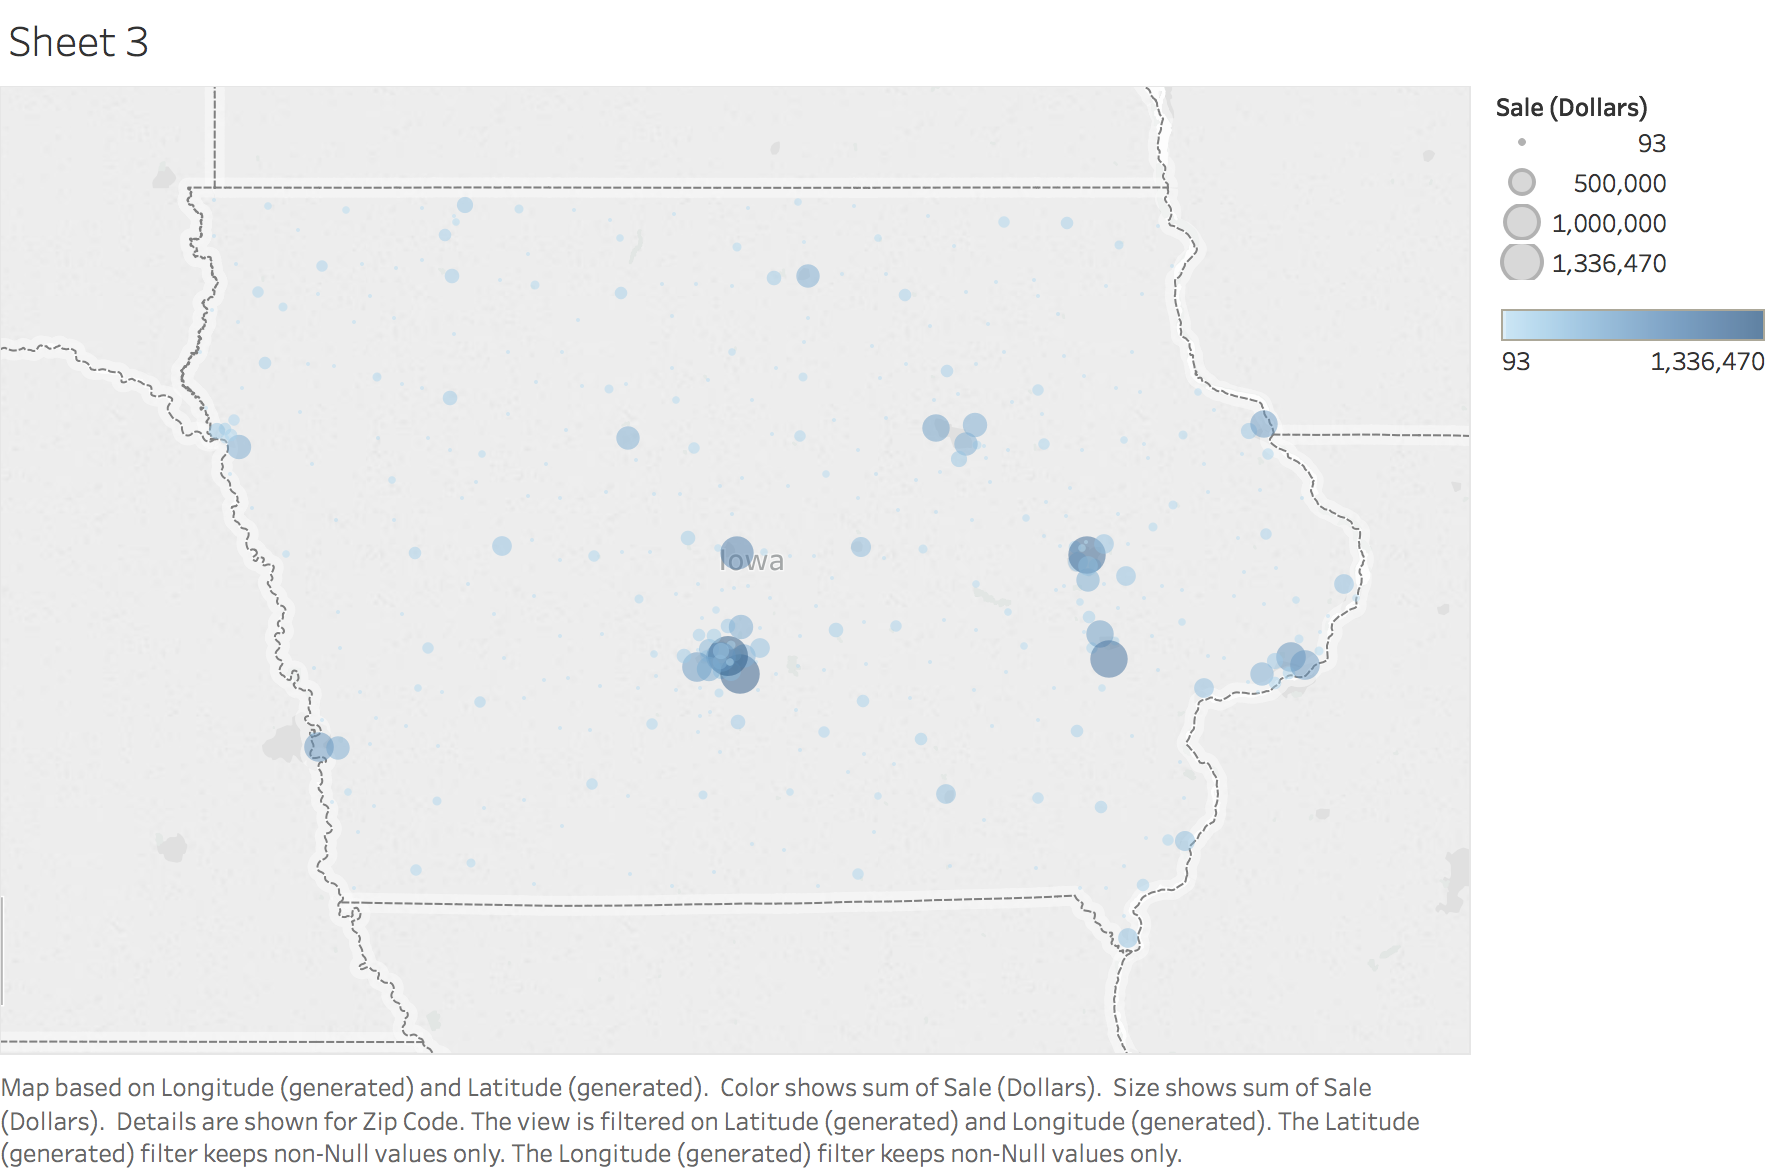

In [319]:
## Map showing amount of sales by county

from IPython.display import Image
Image(filename='county_sales_map.png')

In [320]:
## Next, I wanted to look at the totals of different variables for each store using pivot tables
## Calculate yearly sales for each store in 2015 and 2016
## Drop rows with null values since we are only really interested in stores with sales in both years

yrly_store_stuff = pd.pivot_table(df, values=['Sale (Dollars)'],
                                  index=['Store Number'], columns=['year'], aggfunc=np.sum).dropna()

## Do the same for Jan-Mar for each year but with bottles sold and volume sold added on

q1 = df.ix[(df['month'] < 4)]
q1_store_stuff = pd.pivot_table(q1, values=['Sale (Dollars)', 'Bottles Sold', 'Volume Sold (Liters)'],
                                  index=['Store Number'], columns=['year'], aggfunc=np.sum).dropna()

## Look at the head of full year table
yrly_store_stuff.head()


Sale (Dollars)          
year                   2015      2016
Store Number                         
2106              146326.22  30523.75
2113                9310.22   2065.90
2130              111871.43  27856.11
2152                7721.08   1376.43
2178               24324.18   5588.50

In [321]:
## Just looking at the head of q1 table
q1_store_stuff.head()

Sale (Dollars)           Bottles Sold          \
year                   2015      2016         2015    2016   
Store Number                                                 
2106               39287.29  30523.75       2705.0  2220.0   
2113                2833.25   2065.90        196.0   159.0   
2130               24272.57  27856.11       1533.0  1726.0   
2152                2003.46   1376.43        154.0   136.0   
2178                5856.41   5588.50        490.0   480.0   

             Volume Sold (Liters)           
year                         2015     2016  
Store Number                                
2106                      2526.10  2117.75  
2113                       177.11   177.00  
2130                      1447.25  1556.90  
2152                       151.74   140.13  
2178                       409.81   520.80

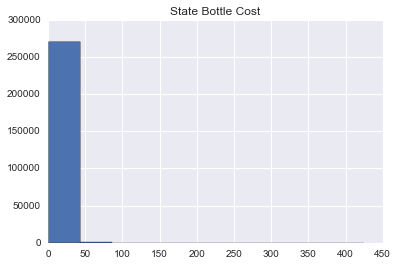

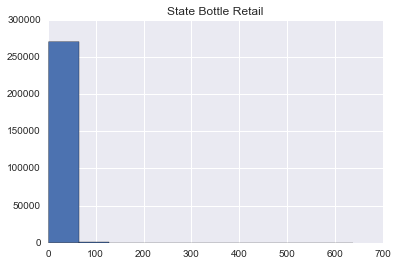

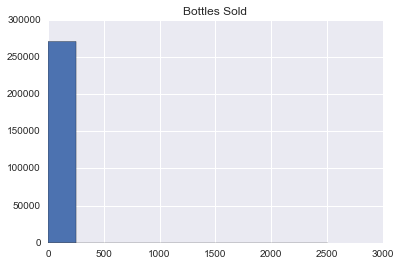

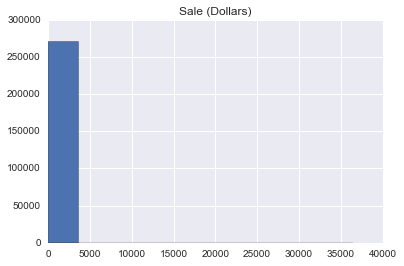

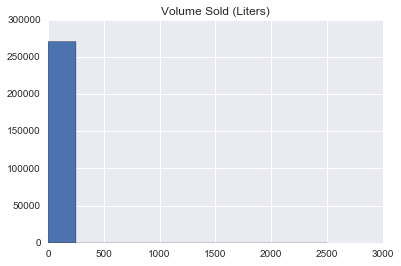

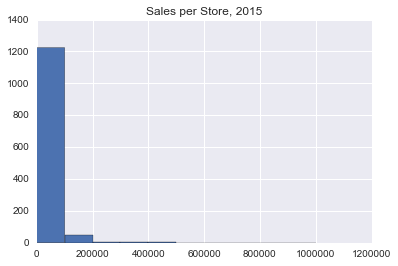

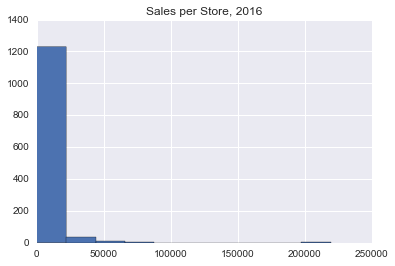

In [322]:
import seaborn as sns
import matplotlib.pyplot as plt
## Histograms to look at the distributions of each variable
plt.hist(df['State Bottle Cost'])
plt.title('State Bottle Cost')
plt.show()

plt.hist(df['State Bottle Retail'])
plt.title('State Bottle Retail')
plt.show()

plt.hist(df['Bottles Sold'])
plt.title('Bottles Sold')
plt.show()

plt.hist(df['Sale (Dollars)'])
plt.title('Sale (Dollars)')
plt.show()

plt.hist(df['Volume Sold (Liters)'])
plt.title('Volume Sold (Liters)')
plt.show()

plt.hist(yrly_store_sales[('Sale (Dollars)', 2015)])
plt.title('Sales per Store, 2015')
plt.show()

plt.hist(yrly_store_sales[('Sale (Dollars)', 2016)])
plt.title('Sales per Store, 2016')
plt.show()

## Each histogram shows that there are some major outliers in each variable and none are really normally distributed

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

One thing that I noticed while looking at the histograms is that there must be at least one pretty large outlier for each numerical variable.  These outliers could definitely throw my results off.  If there is one person who comes to buy thousands of dollars of liquor only once, that data point could definitely cause my model to lean a little bit more in that direction.



# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [323]:
## I created some extra tables with variable means that I thought would be useful as variables

yrly_means = pd.pivot_table(df, values=['Sale (Dollars)', 'Bottles Sold', 'Volume Sold (Liters)'],
                                  index=['Store Number'], columns=['year']).dropna()


q1_means = pd.pivot_table(q1, values=['Sale (Dollars)', 'Bottles Sold', 'Volume Sold (Liters)', 'Bottle Volume (ml)',
                                     'State Bottle Retail'], index=['Store Number'], columns=['year']).dropna()

q1_store_stuff['Store Number'] = q1_store_stuff.index
q1_means['Store Number'] = q1_means.index
yrly_store_stuff['Store Number'] = yrly_store_stuff.index
q1_store_stuff.columns = [('Sale_sum', 2015), ('Sale_sum', 2016),
       ('Bottles Sold_sum', 2015), ('Bottles Sold_sum', 2016),
       ('Volume Sold_sum', 2015), ('Volume Sold_sum', 2016),
       ('Store Number')]

q1_means.columns = [('Sale_mean', 2015), ('Sale_mean', 2016),
       ('Bottles Sold_mean', 2015), ('Bottles Sold_mean', 2016),
       ('Volume Sold_mean', 2015), ('Volume Sold_mean', 2016),
       ('Bottle Volume_mean', 2015), ('Bottle Volume_mean', 2016),
       ('State Bottle Retail_mean', 2015), ('State Bottle Retail_mean', 2016),
       ('Store Number')]

alm_pivot = q1_store_stuff.merge(q1_means, on='Store Number',how='inner')
main_pivot = alm_pivot.merge(yrly_store_stuff, on='Store Number',how='inner')
print main_pivot.columns.values


[('Sale_sum', 2015) ('Sale_sum', 2016) ('Bottles Sold_sum', 2015)
 ('Bottles Sold_sum', 2016) ('Volume Sold_sum', 2015)
 ('Volume Sold_sum', 2016) 'Store Number' ('Sale_mean', 2015)
 ('Sale_mean', 2016) ('Bottles Sold_mean', 2015)
 ('Bottles Sold_mean', 2016) ('Volume Sold_mean', 2015)
 ('Volume Sold_mean', 2016) ('Bottle Volume_mean', 2015)
 ('Bottle Volume_mean', 2016) ('State Bottle Retail_mean', 2015)
 ('State Bottle Retail_mean', 2016) ('Sale (Dollars)', 2015)
 ('Sale (Dollars)', 2016)]


# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

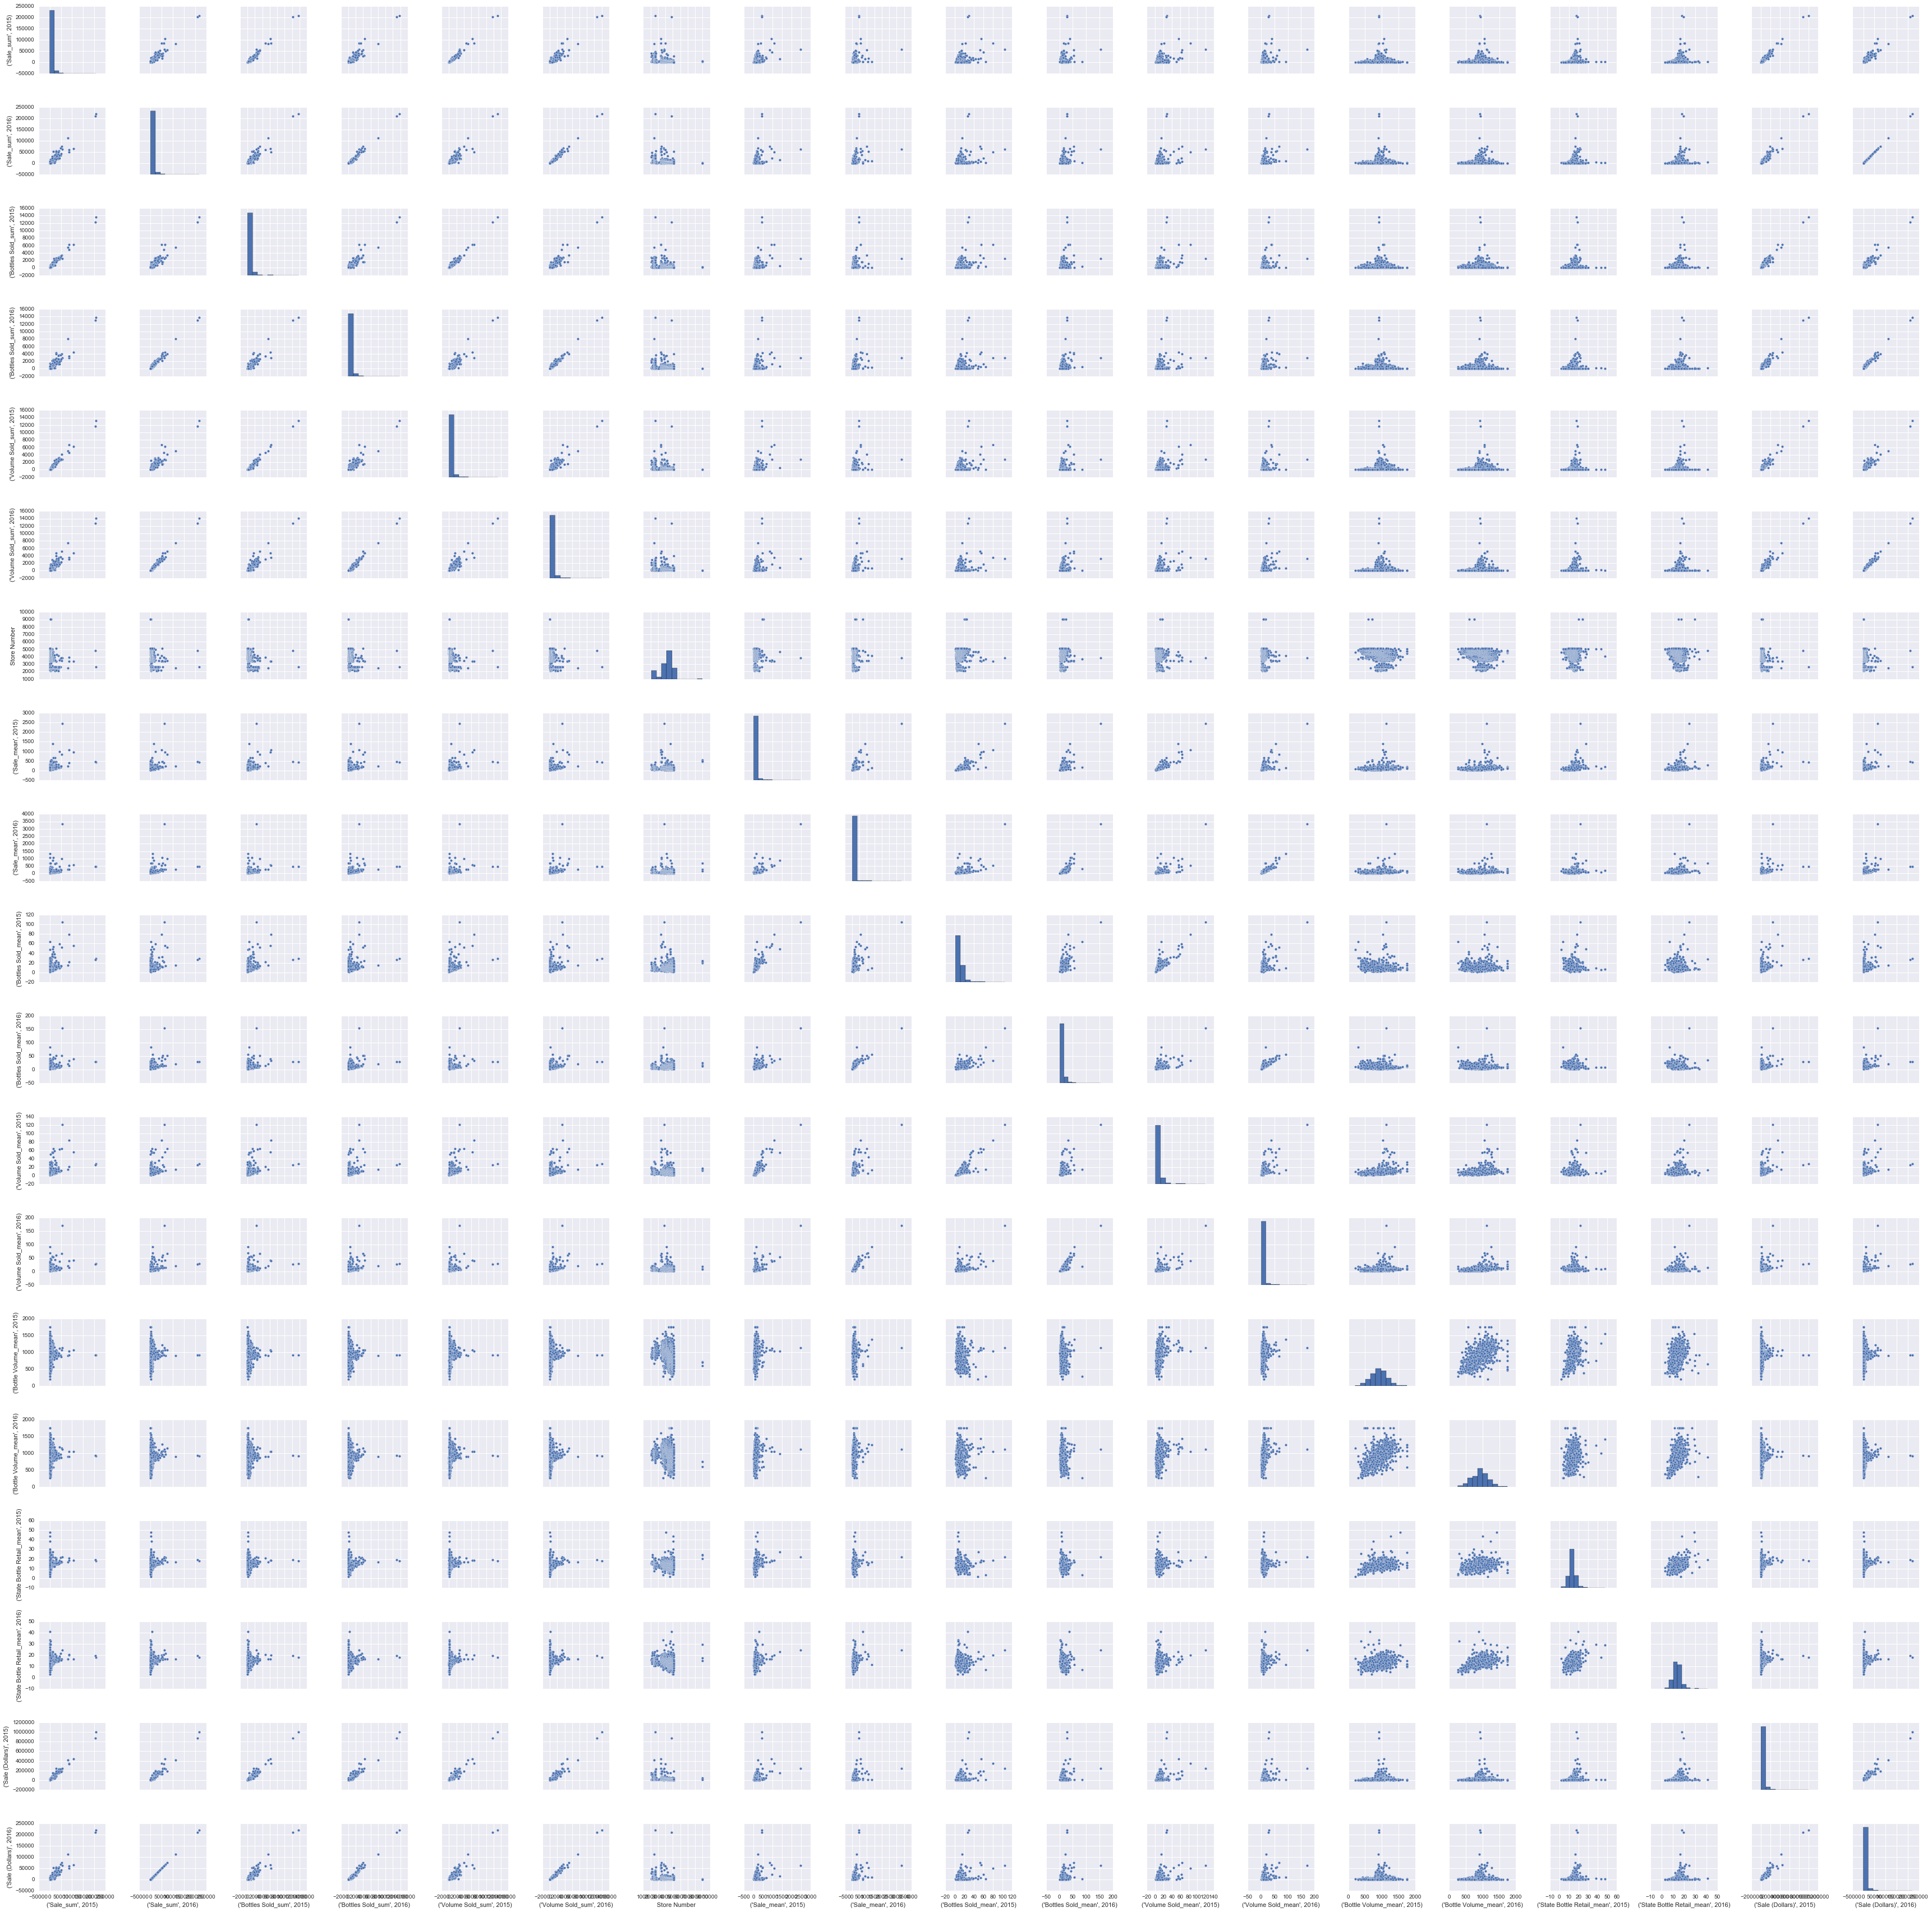

In [213]:
sns.pairplot(main_pivot)
plt.show()

## Looking at the scatter plots created with this pairplot, most variables are possitively correlated with each other.
## The only real exceptions are mean volume of bottle sold, mean retail price, and store number.

In [325]:
## At this point, I wanted to go ahead and find the best combination of predictor variables that made sense, so I used
## these functions to find it that combination.  I excluded variables that didn't seem to correlate with total sales.

from sklearn import datasets, linear_model, metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


cols = [('Sale_sum', 2015),
       ('Bottles Sold_sum', 2015),
       ('Volume Sold_sum', 2015),
       ('Bottles Sold_mean', 2015),
       ('Volume Sold_mean', 2015),
       ('Bottle Volume_mean', 2015),
       ('State Bottle Retail_mean', 2015)]

def func1(X):
    lm = linear_model.LinearRegression()
    X = main_pivot[X]
    y = main_pivot[('Sale (Dollars)', 2015)]
    predictions = cross_val_predict(lm, X, y, cv=5)
    model = lm.fit(X, y)
    return "R^2:", model.score(X, y)
    
def find_best(i):
    best = {}
    for x in i:
        best[x] = func1([x])
    print (max(best, key=best.get)), best[(max(best, key=best.get))]
print 'Best fit with one variable:',find_best(cols)
    
def find_best_2(i):
    two_best = {}
    for x in i:
        for j in i:
            if x != j:
                two_best[x, j] = func1([x, j])
    print (max(two_best, key=two_best.get)), two_best[(max(two_best, key=two_best.get))]
    return
print 'Best fit with two variables:',find_best_2(cols)

def find_best_3(i):
    three_best = {}
    for x in i:
        for j in i:
            for k in i:    
                if x != j != k:
                    three_best[x, j, k] = func1([x, j, k])
    print (max(three_best, key=three_best.get)), three_best[(max(three_best, key=three_best.get))]
    return
print 'Best fit with three variables:',find_best_3(cols)

def find_best_4(i):
    four_best = {}
    for x in i:
        for j in i:
            for k in i:    
                for t in i:    
                    if x != j != k != t:
                        four_best[x, j, k, t] = func1([x, j, k, t])
    print (max(four_best, key=four_best.get)), four_best[(max(four_best, key=four_best.get))]
    return
    
print 'Best fit with four variables:', find_best_4(cols)

# The R^2 values by the time I looked at the best four were only increasing slightly, so I decided to go with them.

 Best fit with one variable: ('Sale_sum', 2015) ('R^2:', 0.96642213186251069)
None
Best fit with two variables: (('Volume Sold_mean', 2015), ('Sale_sum', 2015)) ('R^2:', 0.96700095149349441)
None
Best fit with three variables: (('Sale_sum', 2015), ('Volume Sold_sum', 2015), ('Bottles Sold_sum', 2015)) ('R^2:', 0.96725113011185271)
None
Best fit with four variables: (('Sale_sum', 2015), ('Bottle Volume_mean', 2015), ('Bottles Sold_sum', 2015), ('Volume Sold_sum', 2015)) ('R^2:', 0.96758655166341367)
None


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

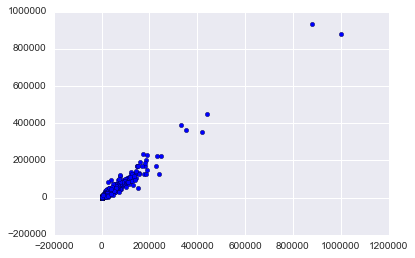

 R^2: 0.966259879157
With an R^2 value this close to 1, we can say that the model is a good predictor of future sales.


In [329]:
from sklearn import linear_model
from sklearn import datasets, linear_model, metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import r2_score
# Fit the model using the predictor variables from above and total sales in 2015 as the target
lm = linear_model.LinearRegression()

X = main_pivot[[('Bottle Volume_mean', 2015), ('Volume Sold_mean', 2015), ('Sale_sum', 2015), 
                ('Bottles Sold_mean', 2015)]]
y = main_pivot[('Sale (Dollars)', 2015)]

predictions1 = cross_val_predict(lm, X, y, cv=5)
model = lm.fit(X, predictions1)
plt.scatter(y, predictions1)
plt.show()

print "R^2:", lm.score(X, y)

# Predict 2016 sales using the model
X = main_pivot[[('Bottle Volume_mean', 2016), ('Volume Sold_mean', 2016), ('Sale_sum', 2016),
                ('Bottles Sold_mean', 2016)]]
predictions = lm.predict(X)
print 'With an R^2 value this close to 1, we can say that the model is a good predictor of future sales.'

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

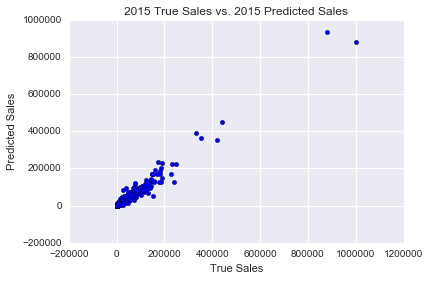

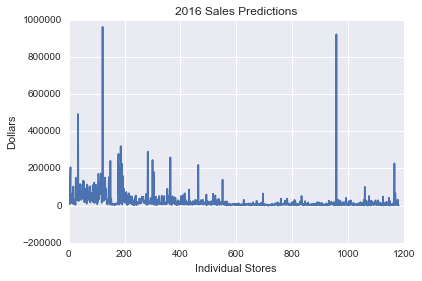

2016 Sales Prediction Sum: 27607603.7808
2015 Sales Sum: 27506362.16
Using the first quarter sales data, we can predict that liquor sales in the state of Iowa will increase in 2016.


In [330]:
# Plotting the 2015 True Sales vs. 2015 Predicted Sales
lm = linear_model.LinearRegression()
X = main_pivot[[('Bottle Volume_mean', 2015), ('Volume Sold_mean', 2015), ('Sale_sum', 2015), 
                ('Bottles Sold_mean', 2015)]]
y = main_pivot[('Sale (Dollars)', 2015)]
predictions1 = cross_val_predict(lm, X, y, cv=5)
plt.scatter(y, predictions1)
plt.title('2015 True Sales vs. 2015 Predicted Sales')
plt.xlabel('True Sales')
plt.ylabel('Predicted Sales')
plt.show()

# Plotting the 2016 Sales Predictions
plt.plot(predictions)
plt.title('2016 Sales Predictions')
plt.xlabel('Individual Stores')
plt.ylabel('Dollars')
plt.show()

## Here, I summed total sales in 2015 and predicted total sales in 2016 to compare them
print '2016 Sales Prediction Sum:', np.sum(predictions)
print '2015 Sales Sum:', sum(main_pivot[('Sale (Dollars)', 2015)])
print 'Using the first quarter sales data, we can predict that liquor sales in the state of Iowa will increase in 2016.'

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

The tax board first wanted a report on liquor sales by county.  I calculated total sales by county using a pivot table and found the top ten and bottom ten counties.  Here are the print outs of the results:

# Top 10 counties in liquor sales 
               Sale (Dollars)
County                       
Polk:             7.785358e+06  
Linn:             3.150429e+06  
Scott:            2.468723e+06   
Johnson:          2.091306e+06  
Black Hawk:       1.936792e+06  
Pottawattamie:    1.280695e+06  
Woodbury:         1.253160e+06  
Dubuque:          1.082556e+06  
Story:            1.075273e+06  
Cerro Gordo:      6.960987e+05   

# Bottom 10 counties in liquor sales 
           Sale (Dollars)
County                   
Fremont:           3230.45  
Adams:            12441.71  
Wayne:            12933.62  
Davis:            13197.52  
Taylor:           14981.09  
Ringgold:         18280.77  
Keokuk:           18348.58  
Audubon:          19655.54  
Decatur:          19805.28  
Van Buren:        21565.97   

I also looked at the frequency of sales per county.  Here are the print outs of the counties with the most and least instances of sales per county:

# Top 10 counties in liquor sale frequency 
               Sale (Dollars)
County                       
Polk:                  49102.0  
Linn:                  23511.0  
Scott:                 16678.0  
Black Hawk:            15083.0  
Johnson:               13189.0  
Pottawattamie:          9111.0  
Story:                  8959.0  
Woodbury:               8562.0  
Dubuque:                7757.0  
Cerro Gordo:            6374.0  

# Bottom 10 counties in liquor sale frequency 
           Sale (Dollars)
County                   
Fremont:              27.0  
Wayne:               160.0  
Ringgold:            202.0  
Davis:               203.0  
Decatur:             224.0  
Audubon:             227.0  
Adams:               234.0  
Van Buren:           245.0  
Taylor:              298.0  
Keokuk:              344.0   

Next, the tax board wanted projections for the rest of the year's liquor sales numbers.

PROBLEM STATEMENT:  For liquor sales, we have all of 2015's data and the first three months of 2016's data.  Using 2015's data, create a linear regression model to use to predict the total sales for 2016.

To predict the sales for the rest of 2016's liquor sales, a model was created using 2015's first quarter sales, mean number of bottles sold, mean total volume sold, and number of bottles sold per store as the predictor variables and 2015's total sales per store as the target.  The predictor variables were chosen by attempting multiple combinations of variables in a model and choosing the combination with the highest R^2 value.  Once the model was chosen, cross-validation was used to train the model.  The final model's R^2 value was 0.966259879157 when 2015 total sales per store was used as the target.

The model was then used to predict the sales for the rest of 2016's liquor sales using the same variables, but from 2016's first quarter.  The predicted sales are plotted above.  The sum of 2016's predicted sales is 27,607,603.78.  This indicates more than a 100,000 predicted increase from the previous year's total sales, which was 27,506,362.16.

As a bonus, I also ran Ridge and Lasso regression models on the data below.  Both of these models appeared to outperform the original model without regularization.  I assume this is because the predictor models used were all correlated with each other.  I discuss this further down the page.

('Coefficients', '4.75 ,-360.14 ,4.53 ,146.77')
R^2: 0.96721748348
alpha: 10.0


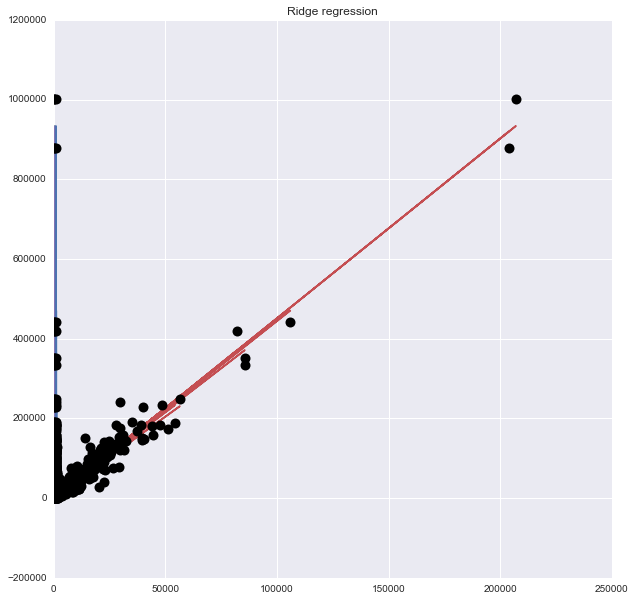

In [309]:
## BONUS - Using Ridge Regression
X = main_pivot[[('Bottle Volume_mean', 2015), ('Volume Sold_mean', 2015), ('Sale_sum', 2015), 
                ('Bottles Sold_mean', 2015)]]
y = main_pivot[('Sale (Dollars)', 2015)]

ridge = linear_model.RidgeCV(cv=5)
plt.figure(figsize=(10,10));



ridge.fit(X, y);
y_ridge = ridge.predict(X)
plt.plot(X, y_ridge);
plt.legend(loc=2);
print('Coefficients' ,' ,'.join(['%.2f' % c for c in ridge.coef_]))
print 'R^2:', ridge.score(X,y)

plt.plot(X, y, 'ok', ms=10);
plt.title("Ridge regression");
print 'alpha:',ridge.alpha_

('Coefficients:', '0.00 ,-0.00 ,4.47 ,-0.00')
R^2 0.96642116544
alpha: 635378.732427


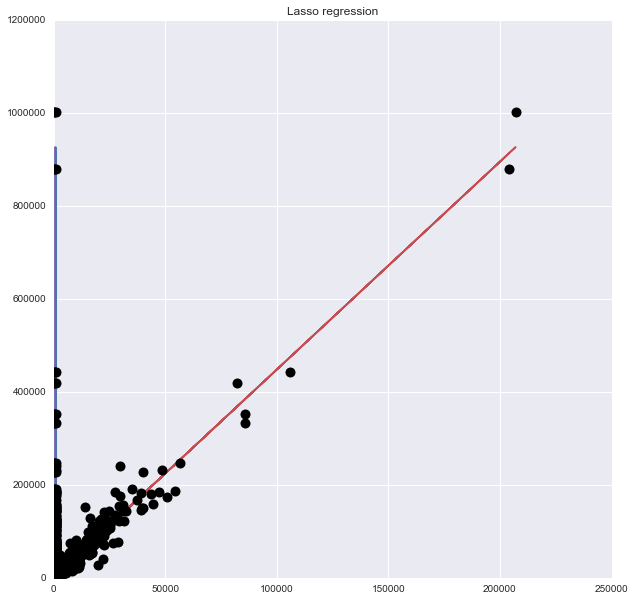

In [310]:
## BONUS - Using Lasso Regression



X = main_pivot[[('Bottle Volume_mean', 2015), ('Volume Sold_mean', 2015), ('Sale_sum', 2015), 
                ('Bottles Sold_mean', 2015)]]
y = main_pivot[('Sale (Dollars)', 2015)]

lasso = linear_model.LassoCV(cv=5)
plt.figure(figsize=(10,10));

lasso.fit(X, y);
y_lasso = lasso.predict(X)
plt.plot(X, y_lasso);
plt.legend(loc=2);
print('Coefficients:', ' ,'.join(['%.2f' % c for c in lasso.coef_]))
print 'R^2', lasso.score(X,y)

plt.plot(X, y, 'ok', ms=10);
plt.title("Lasso regression");
print 'alpha:', lasso.alpha_

# Ridge and Lasso Regression Explanation

Both Lasso and Ridge regressions performed better than the simple linear regression and Ridge performed the best.  Both of them attempted to regularize the model by changing the coefficients of the predictor variables.  Since the predictor variables are all correlated, introducing them all can cause instability in the model.  Ridge regression adjusted the coefficients to fit the model better, but Lasso regression took it a step further and performed variable selection, bringing the coefficients of each variable deemed unneeded to zero, effectively taking the variable out of the model.